# **1. Import the libraries**


In [ ]:
import pickle
import os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
os.getcwd()

'/content'

# **2. Load the dataset**

In [ ]:
#loading test data

infile = open('/content/drive/My Drive/CNN/test.p','rb')
new_dict = pickle.load(infile)
x_test=new_dict['features']
y_test=new_dict['labels']
y_test = tf.keras.utils.to_categorical(y_test)

#loading train data

infile = open('/content/drive/My Drive/CNN/train.p','rb')
new_dict = pickle.load(infile)
x_train=new_dict['features']
y_train=new_dict['labels']
y_train = tf.keras.utils.to_categorical(y_train)

#loading validation data

infile = open('/content/drive/My Drive/CNN/valid.p','rb')
new_dict = pickle.load(infile)
x_valid=new_dict['features']
y_valid=new_dict['labels']
y_valid = tf.keras.utils.to_categorical(y_valid)

infile.close()

In [ ]:
print (x_train.shape,x_test.shape,x_valid.shape)
type(x_train)

(34799, 32, 32, 3) (12630, 32, 32, 3) (4410, 32, 32, 3)


numpy.ndarray

# **3. Visualize the data set**

There are 43 classes. The index for each class is given below.

0 = Speed limit (20km/h) 

1 = Speed limit (30km/h)

2 = Speed limit (50km/h) 

3 = Speed limit (60km/h)

4 = Speed limit (70km/h) 

5 = Speed limit (80km/h)

6 = End of speed limit (80km/h)

7 = Speed limit (100km/h)

8 = Speed limit (120km/h)

9 = No passing

10 = No passing for vehicles over 3.5 metric tons

11 = Rightofway at the next intersection

12 = Priority road

13 = Yield

14 = Stop

15 = No vehicles

16 = Vehicles over 3.5 metric tons prohibited

17 = No entry

18 = General caution

19 = Dangerous curve to the left

20 = Dangerous curve to the right

21 = Double curve

22 = Bumpy road

23 = Slippery road

24 = Road narrows on the right


25 = Road work

26 = Traffic signals

27 = Pedestrians

28 = Children crossing 

29 = Bicycles crossing

30 = Beware of ice/snow

31 = Wild animals crossing

32 = End of all speed and passing limits

33 = Turn right ahead

34 = Turn left ahead

35 = Ahead only

36 = Go straight or right

37 = Go straight or left

38 = Keep right

39 = Keep left

40 = Roundabout mandatory

41 = End of no passing

42 = End of no passing by vehicles over 3.5 metric tons 

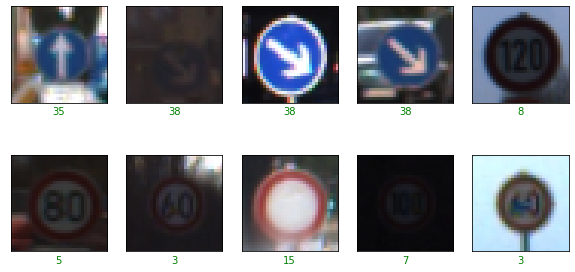

In [ ]:
class_names = range(43)
#image visualization
def show_random_examples(x,y,p):
    indices=np.random.choice(range(x.shape[0]),10,replace=False)
    x=x[indices]
    y=y[indices]
    p=p[indices]
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col='green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
        np.argmax(p[i])
        plt.xlabel(class_names[np.argmax(p[i])],color=col)
    plt.show()
show_random_examples(x_train,y_train,y_train)

# **4. Create the model**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model,num_filters):
        model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters,3,activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    model=tf.keras.models.Sequential()
    model.add(Input(shape=(32,32,3)))
    model=add_conv_block(model,32)
    model=add_conv_block(model,64)
    model=add_conv_block(model,128)
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(43,activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',metrics=['accuracy'])
    
    return model

model=create_model()
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_55 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_56 (Batc (None, 15, 15, 64)      

# **5. Train the model**

In [ ]:
print (x_train.shape)
h=model.fit(x_train/255.,y_train,validation_data=(x_test/255.,y_test),
           epochs=20,batch_size=128,
           callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5),
               tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/CNN/traffic_{val_accuracy:.3f}.h5',
                                                  save_best_only=True,save_weights_only=False,monitor='val_accuracy')
           ])

(34799, 32, 32, 3)
Epoch 1/20
272/272 [==============================] - 5s 19ms/step - loss: 0.0383 - accuracy: 0.9881 - val_loss: 0.0995 - val_accuracy: 0.9781
Epoch 2/20
272/272 [==============================] - 4s 13ms/step - loss: 0.0380 - accuracy: 0.9886 - val_loss: 0.0937 - val_accuracy: 0.9772
Epoch 3/20
272/272 [==============================] - 4s 14ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.1619 - val_accuracy: 0.9756
Epoch 4/20
272/272 [==============================] - 4s 14ms/step - loss: 0.0354 - accuracy: 0.9900 - val_loss: 0.1408 - val_accuracy: 0.9732
Epoch 5/20
272/272 [==============================] - 4s 14ms/step - loss: 0.0337 - accuracy: 0.9894 - val_loss: 0.1642 - val_accuracy: 0.9710
Epoch 6/20
272/272 [==============================] - 4s 14ms/step - loss: 0.0369 - accuracy: 0.9889 - val_loss: 0.1426 - val_accuracy: 0.9747


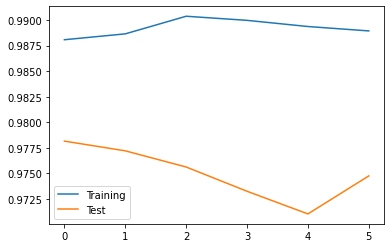

In [ ]:
accs=h.history['accuracy']
val_accs=h.history['val_accuracy']
plt.plot(range(len(accs)),accs,label='Training')
plt.plot(range(len(accs)),val_accs,label='Test')
plt.legend()
plt.show()

# **6. Load and evaluate the model**

In [ ]:
model=tf.keras.models.load_model('/content/drive/My Drive/CNN/traffic_0.980.h5')

In [ ]:
results_train = model.evaluate(x_train, y_train, batch_size=128)

results_valid = model.evaluate(x_valid, y_valid, batch_size=128)

results_test = model.evaluate(x_test, y_test, batch_size=128)

print("\nTrain loss      : "+"{:.2f}".format(results_train[0]),"  Train accuracy      : "+"{:.2f}".format(results_train[1]))
print("\nValidation loss : "+"{:.2f}".format(results_valid[0]),"  Validation accuracy : "+"{:.2f}".format(results_valid[1]))
print("\nTest loss       : "+"{:.2f}".format(results_test[0])," Train accuracy      : "+"{:.2f}".format(results_test[1]))


99/99 [==============================] - 0s 4ms/step - loss: 14.5446 - accuracy: 0.9539

Train loss      : 0.93   Train accuracy      : 0.99

Validation loss : 2.94   Validation accuracy : 0.98

Test loss       : 14.54  Train accuracy      : 0.95


# **6. Check the model on test data set**

Green label denotes true prediction and red labels shows the wrong predictions.

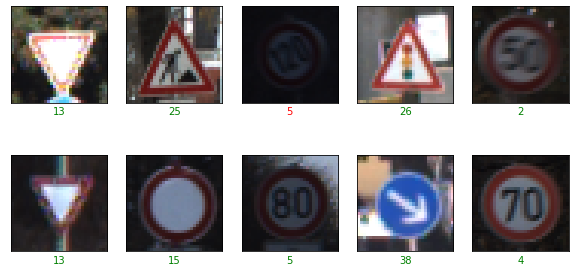

In [ ]:
preds=model.predict(x_test/255.)
show_random_examples(x_test,y_test,preds)

# **7. Test on single images**

Saving Screenshot_3.png to Screenshot_3.png


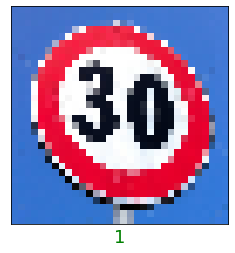

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img_clr = image.load_img(path,color_mode="rgb",target_size=(32, 32))
  x = image.img_to_array(img_clr)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x/255.])
  pred = model.predict(images, batch_size=6)
  plt.imshow(img_clr)
  plt.xticks([])
  plt.yticks([])
  #print (np.argmax(p[i]))
  plt.xlabel(class_names[np.argmax(pred)],color='green',fontsize=18)
plt.show()